In [19]:

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn
import json
import scipy.stats as st

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.gpdc import GPDC
from tigramite.models import LinearMediation, Prediction

In [3]:
f_1 = open('/Users/diego/Desktop/Escritorio_MacBook_Pro_de_Diego/MaderoEquipos/MEO_AI/Data/Granja Madero 2021.json')
f_2 = open('/Users/diego/Desktop/Escritorio_MacBook_Pro_de_Diego/MaderoEquipos/MEO_AI/Data/Granja MAdero 2022.json')
f_3 = open('/Users/diego/Desktop/Escritorio_MacBook_Pro_de_Diego/MaderoEquipos/MEO_AI/Data/Granja MAdero 2023.json')
f_4 = open('/Users/diego/Desktop/Escritorio_MacBook_Pro_de_Diego/MaderoEquipos/MEO_AI/Data/Granja MAdero 2024.json')

In [7]:
# returns JSON object as 
# a dictionary
data_1 = json.load(f_1)
data_2 = json.load(f_2)
data_3 = json.load(f_3)
data_4 = json.load(f_4)

In [13]:
def fill_matrix(data, data_dict, data_ori, year):

    for k in range(len(data_ori)):
        month = data_ori[k]['Month'] - 1 #month position
        col = data_dict[data_ori[k]['Description']]
        data[12 * year + month, col] = data_ori[k]['Value']

    return data

## Extension

In [9]:
#Create dict
def get_dictionaries_one_farm(data):
    data_dict = {}
    sect_dict = {}
    cont_1 = 0
    for k in range(len(data)):
        if data[k]['Description'] not in data_dict:
            data_dict[data[k]['Description']] = cont_1
            cont_1 += 1

            sect_dict[data[k]['Description']] = data[k]['Section']

    return data_dict,  sect_dict

def extend_dictionary(data_dict, sect_dict, data):
    cont_1 = len(data_dict)
    for k in range(len(data)):
        if data[k]['Description'] not in data_dict:
            data_dict[data[k]['Description']] = cont_1
            cont_1 += 1
            sect_dict[data[k]['Description']] = data[k]['Section']

    return data_dict,  sect_dict


def get_dictionaries(data):
    data_dict = {}
    farms_dict = {}
    sect_dict = {}
    cont_1 = 0
    cont_2 = 0
    cont_3 = 0
    for k in range(len(data)):
        if data[k]['Description'] not in data_dict:
            data_dict[data[k]['Description']] = cont_1
            last_name = data[k]['Description']
            cont_1 += 1

        if data[k]['FarmName'] not in farms_dict:
            farms_dict[data[k]['FarmName']] = cont_2
            cont_2 += 1

        if data[k]['Section'] not in sect_dict:
            sect_dict[data[k]['Section']] = cont_3
            cont_3 += 1
    return data_dict, farms_dict, sect_dict

data_dict, sect_dict = get_dictionaries_one_farm(data_1)
print(len(data_dict))
data_dict, sect_dict = extend_dictionary(data_dict, sect_dict, data_2)
print(len(data_dict))
data_dict, sect_dict = extend_dictionary(data_dict, sect_dict, data_3)
data_dict, sect_dict = extend_dictionary(data_dict, sect_dict, data_4)

print(len(data_dict))

1252
1252
1302


In [10]:
n_size = len(data_dict)
data = np.zeros([12 * 3 + 7, n_size])

In [14]:
#Save the data
farms =1
if farms > 1:
    for k in range(n_size * farms):
        #if data_1[k]['Description'] not in data_dict:
        assert data_1[k]['Description']==data_2[k]['Description'], "No son las mismas columnas"
        col = data_dict[data_1[k]['Description']]
        farm = farms_dict[data_1[k]['FarmName']]
        data[0, col, farm] = data_1[k]['Value']
        data[1, col, farm] = data_2[k]['Value']
else:
    for k in range(n_size):

        month_1 = data_1[k]['Month'] - 1 #month position
        month_2 = data_2[k]['Month'] - 1
        month_3 = data_3[k]['Month'] - 1
        month_4 = data_4[k]['Month'] - 1
        print("Month 1 = ", month_1)
        print("Month 2 = ", month_2)
        print("Month 3 = ", month_3)
        print("Month 4 = ", month_4)

        #assert data_1[k]['Month'] == data_2[k]['Month'] and data_2[k]['Month'] == data_3[k]['Month'] and data_3[k]['Month'] == data_4[k]['Month'], "No es el mismo mes" 
        col_1 = data_dict[data_1[k]['Description']]
        col_2 = data_dict[data_2[k]['Description']]
        col_3 = data_dict[data_3[k]['Description']]
        col_4 = data_dict[data_4[k]['Description']]

        data[month_1, col_1] = data_1[k]['Value']
        data[12 + month_2, col_2] = data_2[k]['Value']
        data[24 + month_3, col_3] = data_3[k]['Value']
        data[36 + month_4, col_4] = data_4[k]['Value']


Month 1 =  0
Month 2 =  0
Month 3 =  0
Month 4 =  0
Month 1 =  1
Month 2 =  1
Month 3 =  1
Month 4 =  1
Month 1 =  2
Month 2 =  2
Month 3 =  2
Month 4 =  2
Month 1 =  3
Month 2 =  3
Month 3 =  3
Month 4 =  3
Month 1 =  4
Month 2 =  4
Month 3 =  4
Month 4 =  4
Month 1 =  5
Month 2 =  5
Month 3 =  5
Month 4 =  5
Month 1 =  6
Month 2 =  6
Month 3 =  6
Month 4 =  6
Month 1 =  7
Month 2 =  7
Month 3 =  7
Month 4 =  0
Month 1 =  8
Month 2 =  8
Month 3 =  8
Month 4 =  1
Month 1 =  9
Month 2 =  9
Month 3 =  9
Month 4 =  2
Month 1 =  10
Month 2 =  10
Month 3 =  10
Month 4 =  3
Month 1 =  11
Month 2 =  11
Month 3 =  11
Month 4 =  4
Month 1 =  0
Month 2 =  0
Month 3 =  0
Month 4 =  5
Month 1 =  1
Month 2 =  1
Month 3 =  1
Month 4 =  6
Month 1 =  2
Month 2 =  2
Month 3 =  2
Month 4 =  0
Month 1 =  3
Month 2 =  3
Month 3 =  3
Month 4 =  1
Month 1 =  4
Month 2 =  4
Month 3 =  4
Month 4 =  2
Month 1 =  5
Month 2 =  5
Month 3 =  5
Month 4 =  3
Month 1 =  6
Month 2 =  6
Month 3 =  6
Month 4 =  4
Month 

In [16]:
data_dict

{'Becerras < 1 M': 0,
 'Becerras 1 a 2 M': 1,
 'Novillas 2 a 6 M': 2,
 'Novillas 7 a 13 M': 3,
 'V. Inseminadas 13-17 M': 4,
 'V. Inseminadas > 17 M': 5,
 'V. Prenadas > 13 M': 6,
 'V. Vacias > 13 M': 7,
 'Ordeno 1a Lact': 8,
 'Ordeno 2a Lact': 9,
 'Ordeno 3+ Lact': 10,
 'Secas 1a Lact': 11,
 'Secas 2a Lact': 12,
 'Secas 3+ Lact': 13,
 'Promedio Dias en Leche': 14,
 'Promedio Lactancias': 15,
 'Promedio Hato Prenado': 16,
 'Dias Abiertos (EUR)': 17,
 'Dias Abiertos (MX)': 18,
 'Vacas Frescas < 30 DEL': 19,
 'Anestros 30-60 DEL': 20,
 'Anestros > 60 DEL': 21,
 'Vacas > 150 DEL Abiertas': 22,
 'Vacas sin Produccion > 15 DEL': 23,
 'Secas no Prenadas': 24,
 'Machos': 25,
 'T. Novillas': 26,
 'T.Vaquillas': 27,
 'T.Crianza': 28,
 'T. Hato Ordeno': 29,
 'T. Hato Secas': 30,
 'T.Hato': 31,
 'Rel 100% Ordeno': 32,
 'Rel 100% Secas': 33,
 'Rel Novillas/Vacas': 34,
 'Total 1a Lact': 35,
 'Rel. Vaquillas/1a Lact': 36,
 'Total 2a Lact': 37,
 'Total 3+ Lact': 38,
 'Rel 2+ Lact/1a Lact': 39,
 'Gran

In [17]:
data = fill_matrix(data, data_dict, data_1, year=0)
data = fill_matrix(data, data_dict, data_2, year=1)
data = fill_matrix(data, data_dict, data_3, year=2)
data = fill_matrix(data, data_dict, data_4, year=3)

In [22]:
data

array([[ 37.,  34., 158., ...,   0.,   0.,   0.],
       [ 41.,  36., 156., ...,   0.,   0.,   0.],
       [ 47.,  40., 140., ...,   0.,   0.,   0.],
       ...,
       [ 33.,  28., 170., ...,   0.,   0.,   0.],
       [ 35.,  32., 145., ..., 435.,   0.,  24.],
       [ 39.,  34., 129., ...,   0.,   0.,   0.]])

In [20]:
# Number of variables (columns)
num_vars = data.shape[1]

# Initialize an empty matrix to store the correlation coefficients
correlation_matrix = np.zeros((num_vars, num_vars))

# Compute the Pearson correlation for each pair of columns
for i in range(num_vars):
    for j in range(i, num_vars):
        corr, p_value = st.pearsonr(data[:, i], data[:, j])
        correlation_matrix[i, j] = corr
        correlation_matrix[j, i] = corr  # Correlation matrix is symmetric

print("Scipy Correlation Matrix:\n", correlation_matrix)

/Users/diego/opt/anaconda3/envs/ME/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Scipy Correlation Matrix:
 [[ 1.          0.62218606  0.10732305 ... -0.10574846         nan
  -0.10574846]
 [ 0.62218606  1.          0.39927467 ... -0.1279117          nan
  -0.1279117 ]
 [ 0.10732305  0.39927467  1.         ... -0.05055228         nan
  -0.05055228]
 ...
 [-0.10574846 -0.1279117  -0.05055228 ...  1.                 nan
   1.        ]
 [        nan         nan         nan ...         nan         nan
          nan]
 [-0.10574846 -0.1279117  -0.05055228 ...  1.                 nan
   1.        ]]


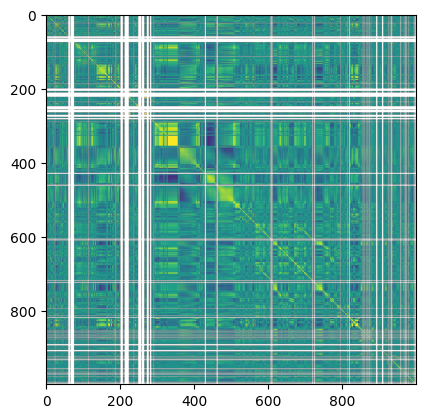

In [21]:
plt.imshow(correlation_matrix[:1000,:1000])
plt.show()

In [ ]:
#Check if there are nans in the data


False

## Reduce Dimensionality

In [23]:
idx_to_kpi = {v: k for k, v in data_dict.items()}


In [26]:
# normalize data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_norm = scaler.fit_transform(data)

In [32]:
# Column-wise standard deviation
stds = X_norm.std(axis=0)

# Indices of zero-variance KPIs
constant_cols = np.where(stds == 0)[0]

print("Constant KPIs:", constant_cols)

# Remove them
X_norm_clean = np.delete(X_norm, constant_cols, axis=1)

Constant KPIs: [  24   60   61   62   63   64   66   67   68   69   70   71   72   73
   74   75  114  188  201  202  203  204  205  206  207  212  213  214
  215  216  217  218  219  220  221  222  223  237  249  250  251  252
  253  254  255  256  257  259  260  261  262  263  264  265  272  273
  274  275  276  277  281  282  283  284  291  429  430  431  461  462
  463  607  608  610  611  720  721  725  726  795  814  819  820  854
  858  861  865  868  872  874  878  892  893  894  895  908  909  910
  911  925  929  932  933  935  958  959  967  970  972  974  979  994
  995  998  999 1002 1003 1012 1013 1027 1028 1029 1033 1034 1035 1039
 1040 1041 1054 1055 1056 1076 1079 1090 1123 1126 1143 1147 1161 1171
 1179 1181 1260 1282 1283 1284 1285 1286 1287 1288 1289 1290 1291 1292
 1293 1294 1295 1296 1297 1300]


In [33]:
idx_to_kpi_clean = {new_i: idx_to_kpi[old_i] 
                    for new_i, old_i in enumerate(np.delete(np.arange(len(idx_to_kpi)), constant_cols))}


In [34]:
corr = np.corrcoef(X_norm_clean, rowvar=False)     # N × N
dist_corr = 1 - corr    

In [39]:
# Dimension reduction

from sklearn.decomposition import PCA

pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_norm_clean.T)  # transpose: KPIs × time


In [40]:
X_pca

array([[ 1.07220854, -0.91062589, -3.15798006, ...,  0.27603606,
        -0.17301517,  0.10727467],
       [ 0.9438463 , -1.40680776, -3.88666551, ..., -0.53510904,
        -1.21458654, -0.06442025],
       [ 2.4008853 , -0.5571732 , -4.47220978, ..., -0.17726701,
         0.28345917,  0.11784069],
       ...,
       [ 2.47929822,  3.12431585,  1.52260137, ..., -0.38487792,
         2.21971869, -0.81300004],
       [ 2.47929822,  3.12431585,  1.52260137, ..., -0.38487792,
         2.21971869, -0.81300004],
       [ 2.47929822,  3.12431585,  1.52260137, ..., -0.38487792,
         2.21971869, -0.81300004]])

In [43]:
import umap

umap_model = umap.UMAP(n_neighbors=20, min_dist=0.2, metric='euclidean')
X_umap = umap_model.fit_transform(X_pca)

/Users/diego/opt/anaconda3/envs/ME/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-11-14 12:32:31.363779: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [44]:
X_umap

array([[-1.0694264 ,  4.143617  ],
       [-0.8297088 ,  3.6189091 ],
       [-4.725386  , -0.11082733],
       ...,
       [-1.1566052 , -0.98443836],
       [-1.1468819 , -0.9751752 ],
       [-1.1328659 , -1.0119377 ]], dtype=float32)

In [47]:
import hdbscan

clusterer = hdbscan.HDBSCAN(
    min_cluster_size=10,
    min_samples=5,
    metric='euclidean'
)

labels = clusterer.fit_predict(X_umap)

/Users/diego/opt/anaconda3/envs/ME/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/diego/opt/anaconda3/envs/ME/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [48]:
labels

array([-1, -1, 19, ..., 11, 11, 11])

In [49]:
from collections import defaultdict

clusters = defaultdict(list)

for idx, label in enumerate(labels):
    kpi_name = idx_to_kpi[idx]
    clusters[label].append(kpi_name)


In [56]:
clusters[6]

['% Peso 90 DEL 6M 2a Lact',
 '% Peso 90 DEL 6M 3+ Lact',
 '% Peso 110 DEL 6M 2a Lact',
 'Preñeces 1er Serv. 1a Lact',
 '% Partos Prematuros 3+ Lact',
 '% Partos Aborto 2a Lact',
 '% Metritis Primaria 1a Lact',
 'Desecho pr Mastitis y P. Ubre 3ra Lact',
 'Desecho por Reproductivos y Abortos 1a Lact',
 'Desecho por Reproductivos y Abortos 2da Lact',
 'Desecho por Reproductivos y Abortos 3ra Lact',
 'Desecho Vacas Secas 1ra Lact',
 'Desecho Vacas Secas 2da Lact',
 'Desecho Vacas Secas 3ra Lact',
 'Desecho Otras Causas y/o Genetica 1a Lact',
 'Desecho Otras Causas y/o Genetica 2da Lact',
 'Vacas Abortadas 0-90 Dias']

In [57]:
# Build theCluster-Centroid Time Series

import numpy as np
from collections import defaultdict

# unique clusters (excluding noise label -1)
unique_clusters = sorted([c for c in set(labels) if c != -1])

cluster_centroids = {}          # cl → time series
cluster_members = defaultdict(list)  # cl → list of KPI names

# Map clusters to KPI names
for kpi_idx, cl in enumerate(labels):
    if cl != -1:
        cluster_members[cl].append(idx_to_kpi[kpi_idx])

# Compute centroids
for cl in unique_clusters:
    kpi_indices = [i for i, c in enumerate(labels) if c == cl]
    centroid = X_norm[:, kpi_indices].mean(axis=1)
    cluster_centroids[cl] = centroid


In [60]:
len(cluster_centroids)

40

In [61]:
#Build the tigramite DataFrame
import pandas as pd
from tigramite.data_processing import DataFrame

# Sort clusters by their label for consistency
cluster_ids = sorted(cluster_centroids.keys())

# Build matrix: T × C
data_centroids = np.column_stack([cluster_centroids[cl] for cl in cluster_ids])

# Column names for Tigramite
cluster_names = [f"Cluster_{cl}" for cl in cluster_ids]

# Tigramite DataFrame
df = DataFrame(data_centroids, var_names=cluster_names)


In [77]:
from tigramite.pcmci import PCMCI
from tigramite.independence_tests.parcorr import ParCorr

parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(dataframe=df, cond_ind_test=parcorr, verbosity=1)

# Max lag recommended: tau_max <= 5 for monthly data
results = pcmci.run_pcmci(
    tau_min=0,
    tau_max=5,
    pc_alpha=0.05,
    alpha_level=0.05
)



##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 5
pc_alpha = [0.05]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable Cluster_0 has 2 link(s):
        (Cluster_23 -1): max_pval = 0.00034, |min_val| =  0.590
        (Cluster_19 -4): max_pval = 0.00878, |min_val| =  0.456

    Variable Cluster_1 has 1 link(s):
        (Cluster_16 -3): max_pval = 0.04904, |min_val| =  0.345

    Variable Cluster_2 has 4 link(s):
        (Cluster_15 -5): max_pval = 0.00919, |min_val| =  0.468
        (Cluster_2 -1): max_pval = 0.01622, |min_val| =  0.423
        (Cluster_16 -4): max_pval = 0.02909, |min_val| =  0.380
        (Cluster_16 -5): max_pval = 0.04305, |min_val| =  0.372

    Variable Cluster_3 has 3 link(s):
        (Cluster_7 -4): max_pval = 0.01889, |min_val| =  0.413
        (Cluster_37 -2): max_pval = 0.02855, |min_val| =  0.393
        (Cluster_39 -3): max_pval = 0

In [82]:
results.keys()

dict_keys(['graph', 'p_matrix', 'val_matrix', 'conf_matrix'])

In [83]:
val_matrix = results['val_matrix']
p_matrix = results['p_matrix']

In [84]:
p_matrix

array([[[1.00000000e+00, 2.79849057e-01, 5.13477204e-01, 9.69331795e-01,
         4.93670344e-01, 5.08349872e-01],
        [1.49866765e-01, 5.38897237e-01, 5.95861020e-01, 8.06491862e-01,
         3.58976234e-01, 7.23086714e-01],
        [2.86614858e-01, 4.25392765e-01, 3.19389888e-01, 1.03788453e-01,
         8.87795924e-02, 8.29423407e-01],
        ...,
        [8.11952130e-01, 9.89104059e-01, 7.26661201e-01, 2.74004815e-01,
         2.50474663e-01, 7.01188844e-01],
        [6.22574910e-01, 5.29215142e-01, 1.09819467e-01, 8.28525442e-01,
         9.13320073e-01, 7.84066380e-01],
        [4.13501616e-01, 6.65033205e-01, 8.79600357e-01, 5.62960499e-01,
         4.37146204e-01, 5.83898136e-01]],

       [[1.49866765e-01, 7.50142060e-01, 7.41766239e-01, 8.73753590e-01,
         8.03320136e-01, 4.49412712e-01],
        [1.00000000e+00, 6.37652853e-01, 9.37629977e-01, 5.99728442e-01,
         8.21200611e-01, 8.73910723e-01],
        [8.99010465e-01, 8.71946384e-01, 6.31724704e-01, 6.185487

In [73]:
for cl in cluster_ids:
    print("Cluster", cl)
    print(cluster_members[cl][:10])  # first 10 KPI names


Cluster 0
['% Grasa', '% Proteina', '% Lactosa', 'Prom SCC', 'Cuenta Std', '% Solidos T.', 'Total Vacas 1a lact (Afilab)', 'Total Vacas 2a lact (Afilab)', 'Vacas Muestreo 3+ Lact', 'Grasa Muestreo 1a Lact']
Cluster 1
['Transferidas a otro rebano (Vaq > 13 M)', '% Desecho Vaquillas > 13 Meses', 'Desecho en Vacas Secas', 'Leche Vida', 'R al % Desecho Vacas Brucelosas', 'Desechadas Frescas < 30 DEL 2a Lact', 'Desecho Frescas < 30 DEL (Periodo) 3a Lact', 'Desecho por Prob. Digestivos 3ra Lact', 'Desecho Otras Causas y/o Genetica 3ra Lact', 'Desecho Vacas Brucelosas 3ra Lact']
Cluster 2
['V. Inseminadas 13-17 M', '% T. Novilllas', 'Datos Peso Nacidas', 'Altura Destete, Nacidas', 'Edad 1er Servicio < 13', 'Peso Genetica 1er Serv > 15', 'Fertilidad PD(+)', 'Grasa-Proteina 5-15 DEL 2a lact', 'Grasa-Proteina 5-15 DEL 3+ lact', 'Grasa-Proteina 16-30 DEL 1a lact']
Cluster 3
['% Hato Celo Ordeno', '% Hato IA Ordeno', '% Hato No Inseminar Ordeno', '% Anestros 30-60 DEL 2Lact', '% Anestros 30-60 DEL

In [74]:
causal_graph = defaultdict(dict)

for i, source in enumerate(cluster_names):
    for j, target in enumerate(cluster_names):
        # val_matrix[i, j, lag] has strengths
        for lag in range(1, 6):
            val = val_matrix[i, j, lag]
            if np.abs(val) > 0.1:      # significance threshold
                causal_graph[source][target] = float(val)


In [75]:
causal_graph

defaultdict(dict,
            {'Cluster_0': {'Cluster_0': -0.5134923167251378,
              'Cluster_1': -0.1361524989423452,
              'Cluster_2': 0.27660134388972996,
              'Cluster_3': 0.4440326774224657,
              'Cluster_4': 0.19905011046661605,
              'Cluster_5': 0.13610234246917283,
              'Cluster_6': -0.15411288632955183,
              'Cluster_7': 0.5425024744657743,
              'Cluster_8': -0.19374811462979505,
              'Cluster_9': 0.25302308702699916,
              'Cluster_10': -0.10390780784651966,
              'Cluster_11': 0.13733504383561979,
              'Cluster_12': 0.29528937390401266,
              'Cluster_13': 0.1868836700641372,
              'Cluster_14': -0.1171543412459587,
              'Cluster_15': -0.3940791044039819,
              'Cluster_16': 0.12492081447197015,
              'Cluster_17': 0.5486145239176634,
              'Cluster_18': 0.3911778629558926,
              'Cluster_19': 0.23402324636978897,
 

In [87]:
P_THRESHOLD = 0.05
STRENGTH_THRESHOLD = 0.1

In [88]:
import numpy as np

edges = []
C = len(cluster_names)
max_lag = val_matrix.shape[2] - 1

for i in range(C):         # source cluster index
    for j in range(C):     # target cluster index
        for lag in range(1, max_lag + 1):
            
            val = val_matrix[i, j, lag]
            p = p_matrix[i, j, lag]
            
            if not np.isnan(p) and p < P_THRESHOLD and abs(val) > STRENGTH_THRESHOLD:
                edges.append({
                    "source_cluster": cluster_names[i],
                    "target_cluster": cluster_names[j],
                    "lag": lag,
                    "strength": float(val),
                    "p_value": float(p),
                    "source_cluster_id": cluster_ids[i],
                    "target_cluster_id": cluster_ids[j],
                    "source_kpis": cluster_members[cluster_ids[i]],
                    "target_kpis": cluster_members[cluster_ids[j]]
                })


In [89]:
from collections import defaultdict

causal_graph = defaultdict(dict)

for e in edges:
    src = e["source_cluster"]
    tgt = e["target_cluster"]

    causal_graph[src][tgt] = {
        "lag": e["lag"],
        "strength": e["strength"],
        "p_value": e["p_value"],
        "source_kpis": e["source_kpis"],
        "target_kpis": e["target_kpis"]
    }


In [90]:
causal_graph["Cluster_4"]

{'Cluster_4': {'lag': 4,
  'strength': -0.4735125783530581,
  'p_value': 0.01260297272057679,
  'source_kpis': ['Promedio DEL al Secado',
   'Prom 305 1 Lact',
   '% Perst 1 Lact',
   'Prom 305 2 Lact',
   '% Perst 2 Lact',
   'Partos 3+ Lact',
   'Nacidos Machos y No ID 1a Lact',
   'Nacidos Muertos 2a Lact',
   'Partos Aborto',
   'Partos Aborto 1a Lact',
   'Edema 2a Lact',
   'Edema 3+ Lact',
   'Mastitis (< 3 DEL) 1a Lact',
   'Mastitis (< 3 DEL) 2a Lact',
   '% Nacidos Machos y No ID',
   '% Nacidos Machos y No ID 1a Lact',
   '% Nacidos Machos y No ID 2a Lact',
   '% Nacidos Muertos 3+ Lact'],
  'target_kpis': ['Promedio DEL al Secado',
   'Prom 305 1 Lact',
   '% Perst 1 Lact',
   'Prom 305 2 Lact',
   '% Perst 2 Lact',
   'Partos 3+ Lact',
   'Nacidos Machos y No ID 1a Lact',
   'Nacidos Muertos 2a Lact',
   'Partos Aborto',
   'Partos Aborto 1a Lact',
   'Edema 2a Lact',
   'Edema 3+ Lact',
   'Mastitis (< 3 DEL) 1a Lact',
   'Mastitis (< 3 DEL) 2a Lact',
   '% Nacidos Machos

In [91]:
def find_cluster_of_kpi(kpi_name, cluster_members):
    for cl, kpis in cluster_members.items():
        if kpi_name in kpis:
            return cl
    return None

In [93]:
cl = find_cluster_of_kpi("Ordeno 3+ Lact", cluster_members)


In [92]:
downstream = causal_graph[f"Cluster_{cl}"]

In [94]:
downstream

{'Cluster_1': {'lag': 1,
  'strength': -0.39619862786873145,
  'p_value': 0.03336267101885877,
  'source_kpis': ['Deteccion de Celos (Ult 2)',
   'Peso Secado (-1) 6M 3+ Lact',
   'Produccion al Secado 3+ Lact',
   'Secadas Dias <=60  2a Lact',
   '% PD Salidas',
   'Total de Machos Desechados',
   '% Becerras Muertas (2-13 Meses)',
   'R al % Becerras Desechadas (2-13 Meses)',
   '% Becerras > 13 Meses No PD(+) y Brucelosas',
   'R al % Desecho Vaquillas > 13 Meses',
   '% Desecho en Vaquillas (Prenadas)',
   'Relación entradas / prom. Hato',
   'Desecho Otras Causas y/o Genetica',
   'Desecho Frescas Periodo',
   '% Desecho Vacas < 60 DEL (Periodo)',
   '% Desecho por Prob. Locomotores',
   'R al % Desecho por Mastitis y P.Ubre',
   '% Desecho en Vacas Secas',
   'R al % Desecho en Vacas Secas',
   '% Desecho Vacas+Secas',
   'Desechadas Frescas < 30 DEL 3a Lact',
   'Desecho Frescas 2a Lact',
   'Desecho Baja Produccion 1a Lact',
   'Desecho pr Mastitis y P. Ubre 1a Lact',
   'Desec

In [95]:
for target, info in downstream.items():
    print("Risk Cluster:", target)
    print("Lag:", info["lag"])
    print("Strength:", info["strength"])
    print("Likely impacted KPIs:", info["target_kpis"])

Risk Cluster: Cluster_1
Lag: 1
Strength: -0.39619862786873145
Likely impacted KPIs: ['Transferidas a otro rebano (Vaq > 13 M)', '% Desecho Vaquillas > 13 Meses', 'Desecho en Vacas Secas', 'Leche Vida', 'R al % Desecho Vacas Brucelosas', 'Desechadas Frescas < 30 DEL 2a Lact', 'Desecho Frescas < 30 DEL (Periodo) 3a Lact', 'Desecho por Prob. Digestivos 3ra Lact', 'Desecho Otras Causas y/o Genetica 3ra Lact', 'Desecho Vacas Brucelosas 3ra Lact', 'Desecho Vacas < 60 DEL (Periodo) 3a Lact', 'Vacas Abortadas 91-180 Dias']
Risk Cluster: Cluster_4
Lag: 3
Strength: -0.42380168618907327
Likely impacted KPIs: ['Promedio DEL al Secado', 'Prom 305 1 Lact', '% Perst 1 Lact', 'Prom 305 2 Lact', '% Perst 2 Lact', 'Partos 3+ Lact', 'Nacidos Machos y No ID 1a Lact', 'Nacidos Muertos 2a Lact', 'Partos Aborto', 'Partos Aborto 1a Lact', 'Edema 2a Lact', 'Edema 3+ Lact', 'Mastitis (< 3 DEL) 1a Lact', 'Mastitis (< 3 DEL) 2a Lact', '% Nacidos Machos y No ID', '% Nacidos Machos y No ID 1a Lact', '% Nacidos Mach

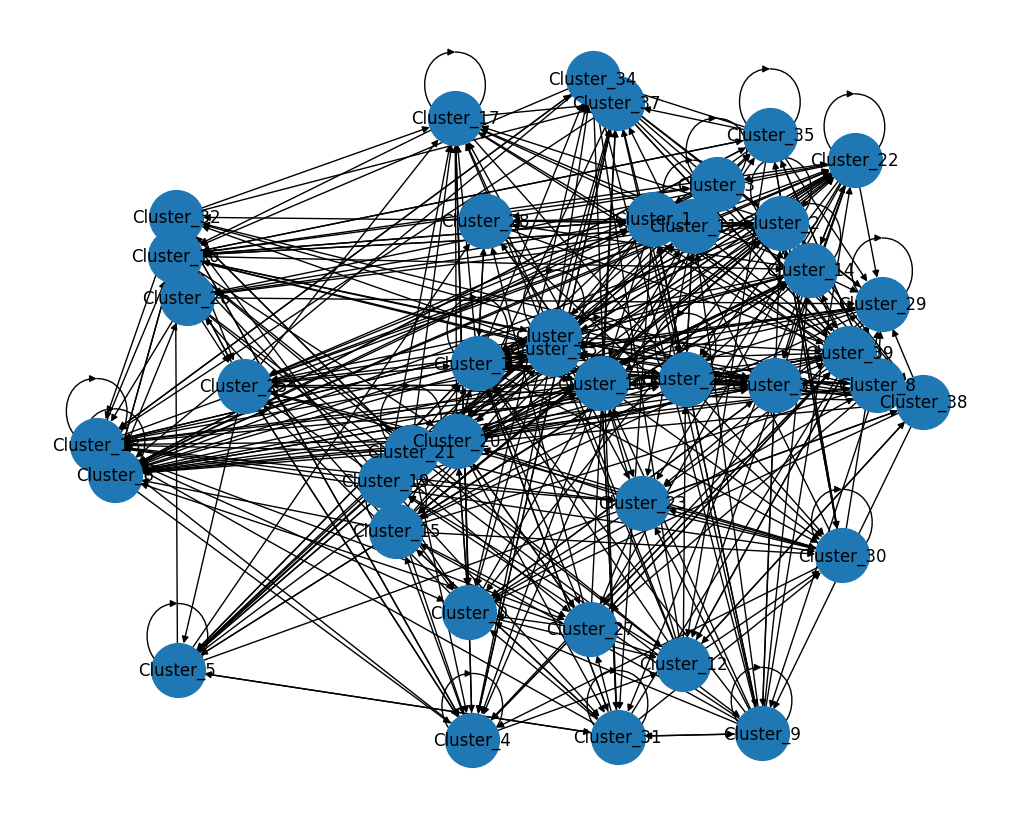

In [96]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

for e in edges:
    G.add_edge(e["source_cluster"], e["target_cluster"], weight=e["strength"])

plt.figure(figsize=(10,8))
nx.draw(G, with_labels=True, node_size=1500)
plt.show()


In [97]:
# save causal graph to JSON
import json
with open("causal_graph.json", "w") as f:
    json.dump(causal_graph, f, indent=4)

In [100]:
#save cluster members
cluster_members_dict = {int(k): v for k, v in cluster_members.items()}

with open("cluster_members.json", "w") as f:
    json.dump(cluster_members_dict, f, indent=4, ensure_ascii=False)